# Machine Learning and Pattern Classification - The haunted turtles
~Noah Pichler, Jacob Harrer, Martin Gegenbauer, Christopher Schicho
## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
anot = pd.read_pickle("./data/task_2_annotations.pkl").reset_index()
anot.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
1,31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
2,62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
3,93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
4,124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1


In [3]:
feat = pd.read_pickle("./data/task_2_features.pkl")
feat.head()

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.8,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.6,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.6,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.4,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.6,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731


In [4]:
# quick overview of the annotations
anot.describe().loc[:,'arousal':'gemmes_wandering']

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
count,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000
mean,2.929492,0.020849,2.901440,2.673616,2.366187,2.723275,2.395525,2.313495,2.276725,2.596664,2.148218,2.968537,2.561031,2.434420,2.690178,2.496209
std,1.184031,1.099842,1.267184,1.235916,1.297041,1.371744,1.367916,1.232190,1.239287,1.412181,1.177312,1.329116,1.261079,1.264754,1.258940,1.279556
min,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,-1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:>

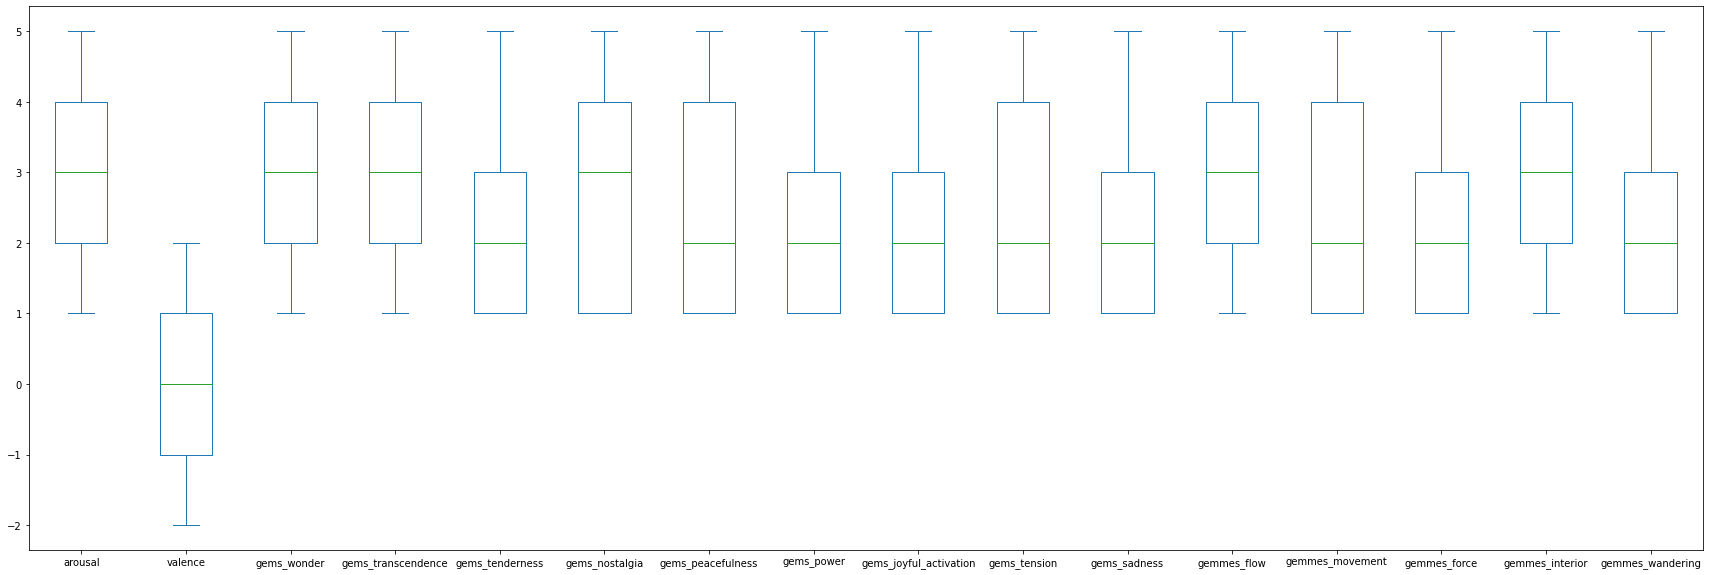

In [5]:
anot.loc[:,'arousal':'gemmes_wandering'].plot.box(figsize=(30,10))

In [6]:
# mean over the whole dataset
anot_mean = pd.DataFrame(anot.mean(axis=0)).T
anot_mean

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,3011.111069,6.037149,13.0,97.071645,2.929492,0.020849,2.90144,2.673616,2.366187,2.723275,2.395525,2.313495,2.276725,2.596664,2.148218,2.968537,2.561031,2.43442,2.690178,2.496209


In [7]:
# median over the whole dataset
anot_median = pd.DataFrame(anot.median(axis=0)).T
anot_median

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,3009.5,6.0,13.0,97.0,3.0,0.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0


In [8]:
# standard deviation over the whole dataset
anot_std = pd.DataFrame(anot.std(axis=0)).T
anot_std

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1749.001419,3.179759,7.806583,56.340712,1.184031,1.099842,1.267184,1.235916,1.297041,1.371744,1.367916,1.23219,1.239287,1.412181,1.177312,1.329116,1.261079,1.264754,1.25894,1.279556


In [9]:
# Calculates the mean, median, standard deviation for each segment and pianist
mean_seg = []
median_seg = []
std_seg = []
for pia_id in range(1, anot["pianist_id"][len(anot)-1] + 1):
    pianist = anot[anot["pianist_id"] == pia_id]
    for seg_id in range(1, anot["segment_id"][len(anot)-1] + 1):
        mask = pianist["segment_id"] == seg_id
        mean_seg.append(pianist[mask].mean(axis=0))
        median_seg.append(pianist[mask].median(axis=0))
        std_seg.append(pianist[mask].std(axis=0))

In [10]:
mean_seg = pd.DataFrame(mean_seg)
mean_seg.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,3208.5,1.0,1.0,107.75,3.875000,0.000000,3.375000,3.250000,2.125000,2.375000,1.750000,2.375000,2.875000,2.625000,1.875000,3.375,4.125000,2.500000,2.250000,2.000000
1,156.0,1.0,2.0,98.00,2.909091,0.181818,2.818182,2.545455,1.636364,1.545455,1.545455,2.909091,3.000000,3.363636,1.727273,3.000,3.636364,3.000000,1.909091,2.090909
2,3209.5,1.0,3.0,107.75,3.000000,-0.250000,1.875000,1.750000,1.375000,1.750000,1.375000,2.625000,1.500000,3.375000,2.375000,2.000,3.250000,2.500000,1.750000,1.750000
3,157.0,1.0,4.0,98.00,3.000000,-0.181818,2.727273,2.636364,2.545455,2.545455,2.272727,2.363636,1.454545,2.727273,2.909091,3.000,1.727273,2.363636,2.818182,2.363636
4,3210.5,1.0,5.0,107.75,2.875000,1.000000,3.625000,3.375000,2.375000,2.375000,2.875000,2.375000,3.875000,1.625000,1.500000,3.750,3.250000,2.375000,2.875000,3.250000


In [11]:
median_seg = pd.DataFrame(median_seg)
median_seg.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,3208.5,1.0,1.0,88.0,4.0,0.0,4.0,3.5,2.0,2.5,1.5,2.0,3.0,3.0,2.0,4.0,4.0,2.5,2.0,2.0
1,156.0,1.0,2.0,105.0,3.0,0.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0
2,3209.5,1.0,3.0,88.0,3.0,-0.5,1.5,2.0,1.0,1.0,1.0,2.0,1.0,3.5,2.5,1.5,3.5,2.5,1.5,1.5
3,157.0,1.0,4.0,105.0,3.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0
4,3210.5,1.0,5.0,88.0,3.0,1.0,4.0,3.0,1.5,2.0,3.0,2.5,4.0,1.0,1.5,4.0,3.5,2.5,2.5,3.0


In [12]:
std_seg = pd.DataFrame(std_seg)
std_seg.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,75.934182,0.0,0.0,60.577577,0.991031,0.925820,1.302470,1.281740,0.991031,1.060660,0.886405,1.187735,1.457738,1.407886,0.834523,1.302470,0.834523,1.195229,0.886405,0.925820
1,102.815369,0.0,0.0,64.816665,0.831209,0.981650,1.167748,1.128152,0.674200,0.820200,0.820200,1.221028,1.000000,1.120065,0.786245,1.264911,1.566699,0.894427,1.044466,0.943880
2,75.934182,0.0,0.0,60.577577,1.195229,0.886405,1.356203,0.707107,0.744024,1.388730,0.744024,1.302470,0.925820,1.407886,1.302470,1.414214,1.752549,1.195229,0.886405,1.035098
3,102.815369,0.0,0.0,64.816665,1.000000,1.167748,1.678744,1.501514,1.507557,1.439697,1.009050,1.206045,0.522233,1.103713,1.578261,1.183216,0.786245,1.286291,1.167748,1.120065
4,75.934182,0.0,0.0,60.577577,0.834523,0.534522,0.916125,1.187735,1.685018,1.597990,1.457738,1.060660,1.125992,1.060660,0.534522,0.886405,1.164965,1.302470,1.642081,1.164965


In [13]:
# Calulates the mean and median for every annotator
mean_annotators = []
median_annotators = []
for anno in range(1, max(anot["annotator_id"]) + 1):
    mean_annotators.append(anot[anot["annotator_id"] == anno].mean(axis=0))
    median_annotators.append(anot[anot["annotator_id"] == anno].median(axis=0))

In [14]:
mean_annotators = pd.DataFrame(mean_annotators)
mean_annotators.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,533.0,5.0,13.0,1.0,2.461538,0.000000,2.230769,2.461538,2.307692,2.384615,2.384615,1.692308,1.230769,2.384615,1.769231,3.692308,1.769231,2.000000,2.923077,2.076923
1,626.5,6.0,13.0,2.0,2.500000,-0.214286,3.000000,3.142857,1.857143,2.785714,2.142857,2.214286,2.642857,2.500000,2.285714,3.000000,2.714286,2.142857,2.071429,2.928571
2,1742.5,8.0,13.0,3.0,3.000000,-0.071429,3.500000,3.357143,2.714286,3.071429,2.428571,3.142857,2.571429,2.642857,2.214286,3.071429,2.928571,3.000000,3.214286,2.285714
3,3416.0,10.0,13.0,4.0,2.692308,-0.153846,3.076923,2.846154,2.384615,3.076923,2.692308,2.615385,2.000000,2.769231,2.692308,2.846154,2.538462,2.538462,2.461538,2.384615
4,1215.5,7.0,13.0,5.0,3.714286,0.142857,2.428571,2.500000,2.285714,2.642857,2.428571,3.357143,2.642857,2.928571,2.428571,2.928571,2.785714,3.285714,2.928571,2.285714


In [15]:
median_annotators = pd.DataFrame(median_annotators)
median_annotators.head()

,index,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,533.0,5.0,13.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,3.0,2.0
1,626.5,6.0,13.0,2.0,2.0,0.0,3.5,3.5,1.0,3.0,1.5,1.5,2.5,2.5,2.0,3.0,3.0,1.0,1.5,2.5
2,1742.5,8.0,13.0,3.0,3.0,0.0,4.0,3.5,2.5,3.5,2.0,3.0,2.0,2.5,2.0,3.0,3.0,3.0,3.5,2.0
3,3416.0,10.0,13.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
4,1215.5,7.0,13.0,5.0,4.0,1.0,2.0,2.5,2.0,2.5,2.0,3.5,3.0,3.0,2.5,3.5,2.0,3.5,3.5,2.5


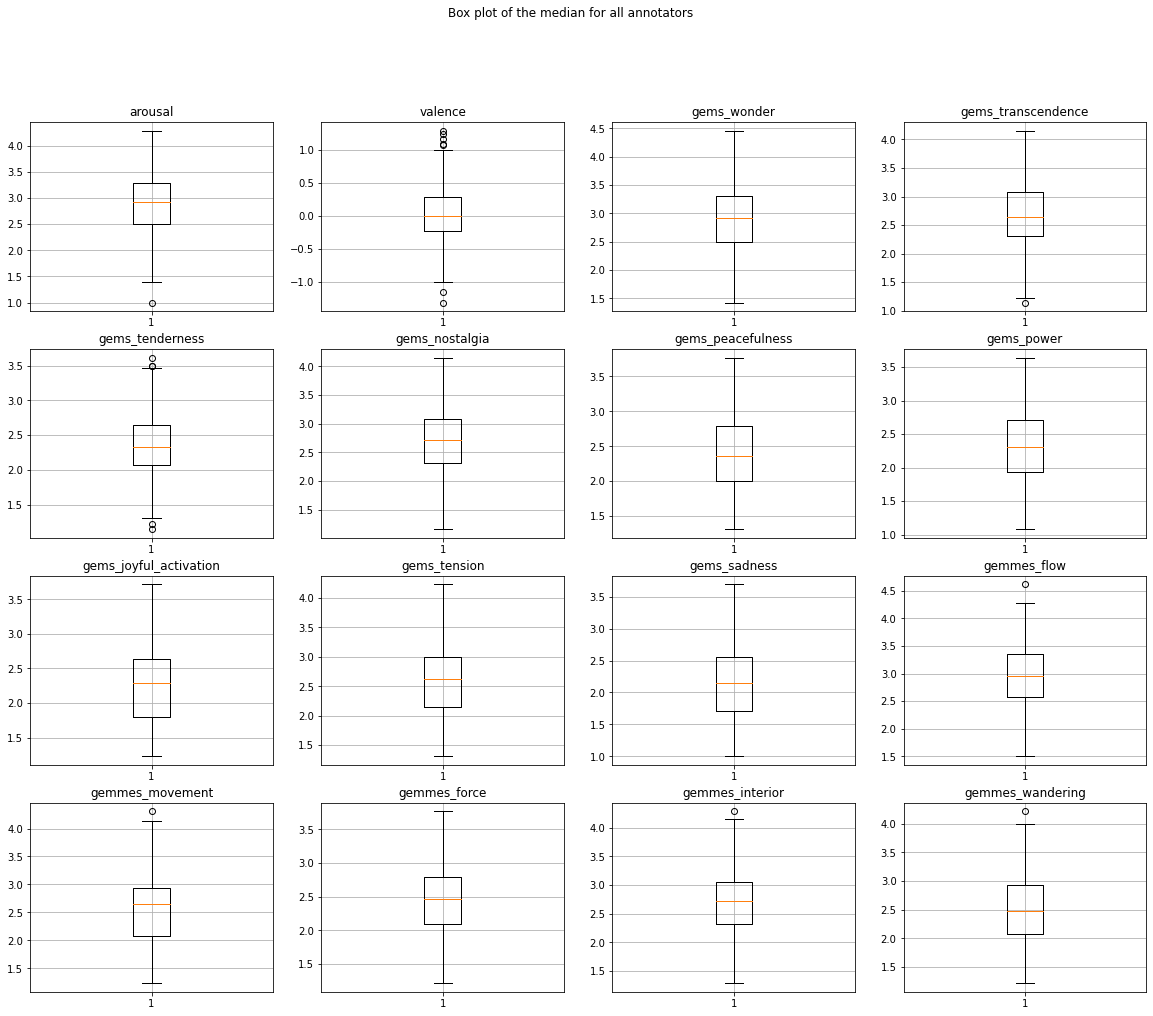

In [34]:
names = [x for x in median_annotators.loc[:,'arousal':'gemmes_wandering']]
fig, axes = plt.subplots(4,4, figsize=(20,16))

i = 0
for ax in axes.flat:
    ax.boxplot(mean_annotators[names[i]])
    ax.set_title(names[i])
    ax.grid()
    i += 1
    
fig.suptitle('Box plot of the median for all annotators')
plt.show()

In [35]:
def search_for_outliers(median, std, data, threshold=4, std_multiplier=1.25):
    """
    :median: median of the original dataframe
    :std: standard deviation of the original dataframe
    :data: dataframe in which to search for outliers
    :threshold: how much unconsistent columns are needed, to count it as outlier
    :std_multiplier: multiplier for the used standard deviation (ajust for extremer outliers)
    
    :returns: a dataframe of found outliers
    """
    outliers = abs(data.sub(median.squeeze(), axis=1)).loc[:,'arousal':'gemmes_wandering'].lt((std*std_multiplier).loc[:,'arousal':'gemmes_wandering'].squeeze())
    return data[outliers.sum(axis=1) <= outliers.shape[1]-threshold]

In [36]:
search_for_outliers(anot_median, anot_std, median_annotators).loc[:,'arousal':'gemmes_wandering']

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
30,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0
36,4.0,1.0,4.5,3.0,2.5,1.0,3.0,2.0,4.0,1.0,1.0,5.0,5.0,2.5,5.0,2.5
43,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,3.0,3.0,2.0,1.0
49,5.0,1.0,4.0,4.0,2.0,1.0,1.0,4.0,4.0,1.0,1.0,2.0,4.0,5.0,2.0,3.0
66,4.0,-1.0,4.0,3.5,1.0,1.0,1.0,3.5,1.5,4.5,2.0,2.5,3.5,4.5,3.5,4.0
72,3.0,0.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0
74,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.5,1.0
89,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,4.0
113,4.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0
